In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from scipy import stats
# imported libraries

In [2]:
# #clean per-capita-meat-type.csv
# import pandas as pd

# meat_df = pd.read_csv("datasets/original datasets/per-capita-meat-type.csv")
# codes_df = pd.read_csv("datasets/codes.csv")

# merged = pd.merge(meat_df, codes_df, left_on="Code", right_on="alpha-3", how="left")

# filtered = merged[merged["region"].isin(["Asia", "Europe"])]

# latest = filtered.sort_values("Year").groupby("Code").tail(1)

# meat_columns = [col for col in latest.columns if col.startswith("Meat")]
# latest["Total_Meat_kg_per_capita"] = latest[meat_columns].sum(axis=1)

# final_df = latest[["Entity", "Code", "Year", "region", "Total_Meat_kg_per_capita"] + meat_columns]

# final_df.to_csv("asia_europe_meat_consumption.csv", index=False)

# print(final_df["region"].value_counts())


# Why our research is relevant
---
There is always the debate in diet of meats versus vegetables, and we want to find out if they really are mutually exclusive. We also want to analyse the trends in meat and vegetable consumption over the years, and how they play off of each other.

# Preliminary Cleanup
---

In [3]:
#This is what i used to merge the datasets, not rlly needed anymore but here it is for reference
# import pandas as pd

# # Load datasets
# meat_df = pd.read_csv("datasets/asia_europe_meat_consumption.csv")
# fruit_df = pd.read_csv("datasets/fruit-consumption-per-capita.csv")
# veg_df = pd.read_csv("datasets/vegetable-consumption-per-capita.csv")

# # Rename columns for clarity
# fruit_df = fruit_df.rename(columns={
#     "Fruit | 00002919 || Food available for consumption | 0645pc || kilograms per year per capita": "Fruit_kg_per_capita"
# })
# veg_df = veg_df.rename(columns={
#     "Vegetables | 00002918 || Food available for consumption | 0645pc || kilograms per year per capita": "Vegetables_kg_per_capita"
# })

# # Merge datasets on Entity, Code, and Year
# merged_df = meat_df.merge(
#     fruit_df[["Entity", "Code", "Year", "Fruit_kg_per_capita"]],
#     on=["Entity", "Code", "Year"],
#     how="inner"
# ).merge(
#     veg_df[["Entity", "Code", "Year", "Vegetables_kg_per_capita"]],
#     on=["Entity", "Code", "Year"],
#     how="inner"
# )

# # Check for missing values
# print(merged_df.isnull().sum())

# # Save the merged dataset
# merged_df.to_csv("datasets/merged_meat_fruit_veg.csv", index=False)

# # Display the first few rows of the merged dataset
# print(merged_df.head())

# Exploratory Data Analysis
---

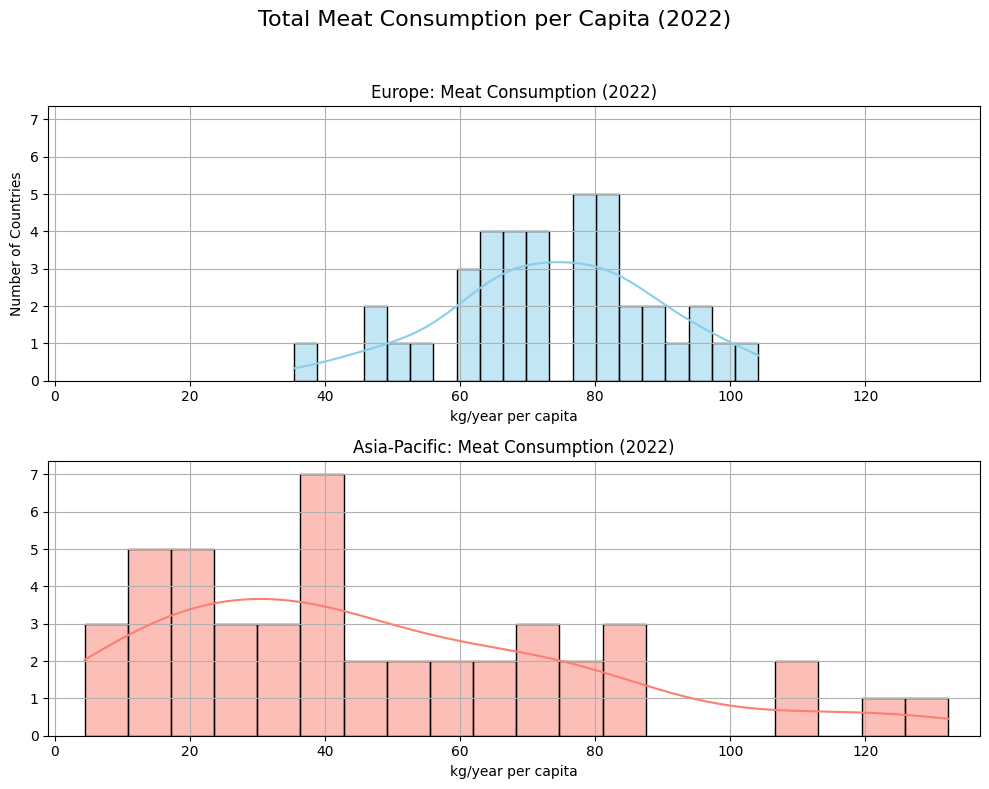

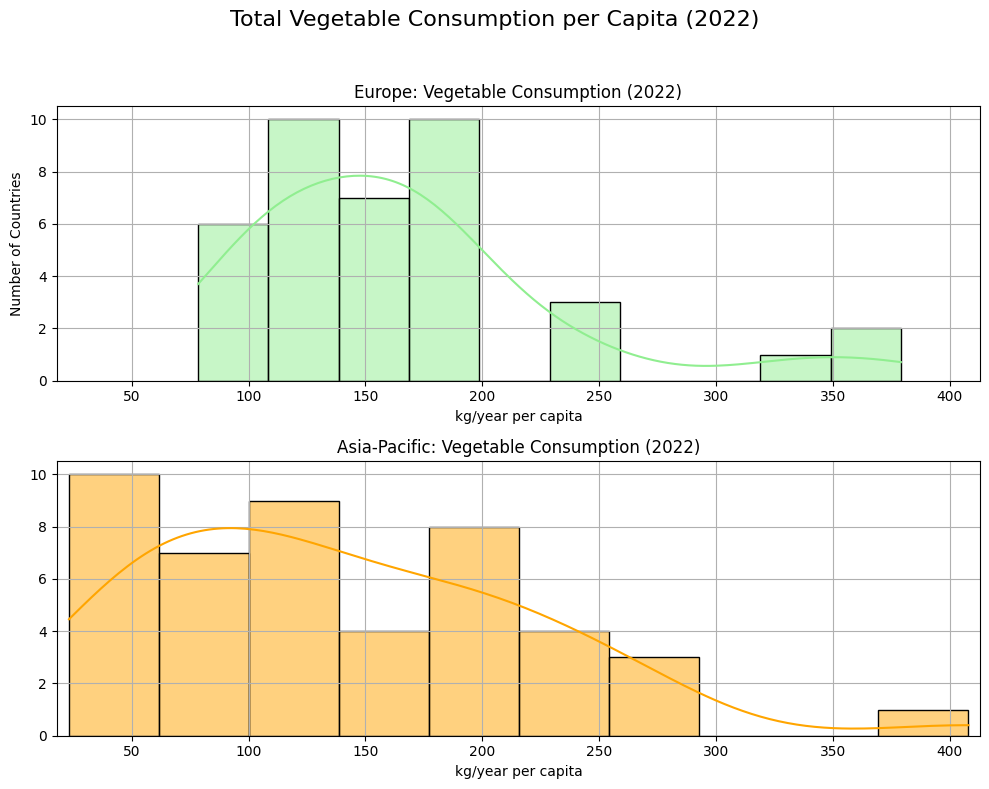

In [4]:
#This is the refactored code for Tuns eda, it uses merged_meat_fruit_veg.csv
# LOAAAAAAAAAADDDDDDDDDDDDDDDDD
merged_df = pd.read_csv("datasets/merged_meat_fruit_veg.csv")

# Filter data for twozerotwotwo
merged_2022 = merged_df[merged_df['Year'] == 2022]

# seperate data by region
europe_data = merged_2022[merged_2022['region'] == 'Europe']
asia_data = merged_2022[merged_2022['region'] == 'Asia']

#  Meat Consumption Histogram  #
# Get combined min and max for x-axis
min_x_meat = min(europe_data['Total_Meat_kg_per_capita'].min(), asia_data['Total_Meat_kg_per_capita'].min())
max_x_meat = max(europe_data['Total_Meat_kg_per_capita'].max(), asia_data['Total_Meat_kg_per_capita'].max())
xlim_meat = (int(min_x_meat) - 5, int(max_x_meat) + 5)

# Set up subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharey=True)

# Europe histogram
sns.histplot(europe_data['Total_Meat_kg_per_capita'], color='skyblue', kde=True, bins=20, ax=axs[0])
axs[0].set_title('Europe: Meat Consumption (2022)')
axs[0].set_xlabel('kg/year per capita')
axs[0].set_ylabel('Number of Countries')
axs[0].set_xlim(xlim_meat)
axs[0].grid(True)

# Asia-Pacific histogram
sns.histplot(asia_data['Total_Meat_kg_per_capita'], color='salmon', kde=True, bins=20, ax=axs[1])
axs[1].set_title('Asia-Pacific: Meat Consumption (2022)')
axs[1].set_xlabel('kg/year per capita')
axs[1].set_ylabel('')
axs[1].set_xlim(xlim_meat)
axs[1].grid(True)

fig.suptitle('Total Meat Consumption per Capita (2022)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Vegetable Consumption Histogram  #
# Get combined min and max for x-axis
min_x_veg = min(europe_data['Vegetables_kg_per_capita'].min(), asia_data['Vegetables_kg_per_capita'].min())
max_x_veg = max(europe_data['Vegetables_kg_per_capita'].max(), asia_data['Vegetables_kg_per_capita'].max())
xlim_veg = (int(min_x_veg) - 5, int(max_x_veg) + 5)

# Set up side-by-side plots
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharey=True)

# Europe histogram
sns.histplot(europe_data['Vegetables_kg_per_capita'], color='lightgreen', kde=True, bins=10, ax=axs[0])
axs[0].set_title('Europe: Vegetable Consumption (2022)')
axs[0].set_xlabel('kg/year per capita')
axs[0].set_ylabel('Number of Countries')
axs[0].set_xlim(xlim_veg)
axs[0].grid(True)

# Asia-Pacific histogram
sns.histplot(asia_data['Vegetables_kg_per_capita'], color='orange', kde=True, bins=10, ax=axs[1])
axs[1].set_title('Asia-Pacific: Vegetable Consumption (2022)')
axs[1].set_xlabel('kg/year per capita')
axs[1].set_ylabel('')
axs[1].set_xlim(xlim_veg)
axs[1].grid(True)


fig.suptitle('Total Vegetable Consumption per Capita (2022)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

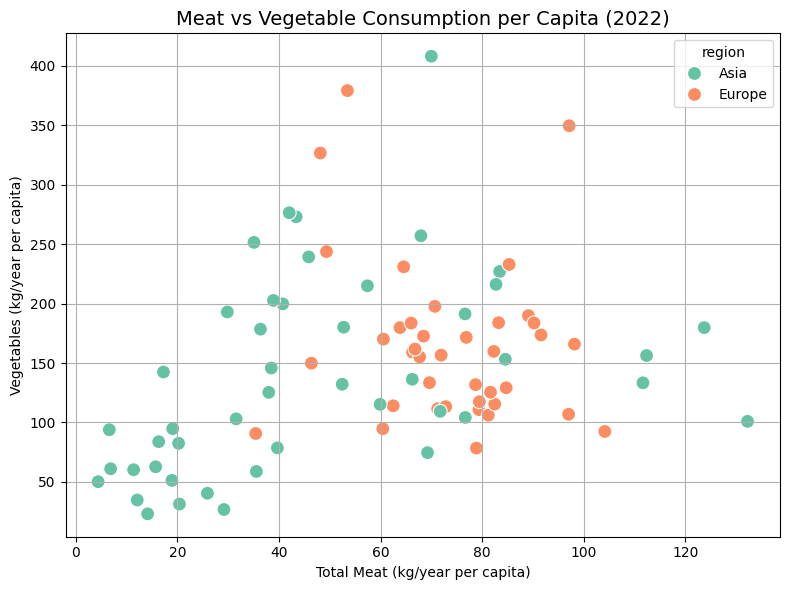

In [5]:
# Load the dataset
merged_df = pd.read_csv("datasets/merged_meat_fruit_veg.csv")

# Filter for 2022 data
merged_2022 = merged_df[merged_df['Year'] == 2022]

# Create scatterplot with regression line
plt.figure(figsize=(8, 6))

# Overlay points with color by region
sns.scatterplot(
    data=merged_2022,
    x='Total_Meat_kg_per_capita',
    y='Vegetables_kg_per_capita',
    hue='region',
    palette='Set2',
    s=100,
    legend=True
)

plt.title('Meat vs Vegetable Consumption per Capita (2022)', fontsize=14)
plt.xlabel('Total Meat (kg/year per capita)')
plt.ylabel('Vegetables (kg/year per capita)')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\takoo\AppData\Local\Temp\ipykernel_880\459705022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\takoo\AppData\Local\Temp\ipykernel_880\459705022.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


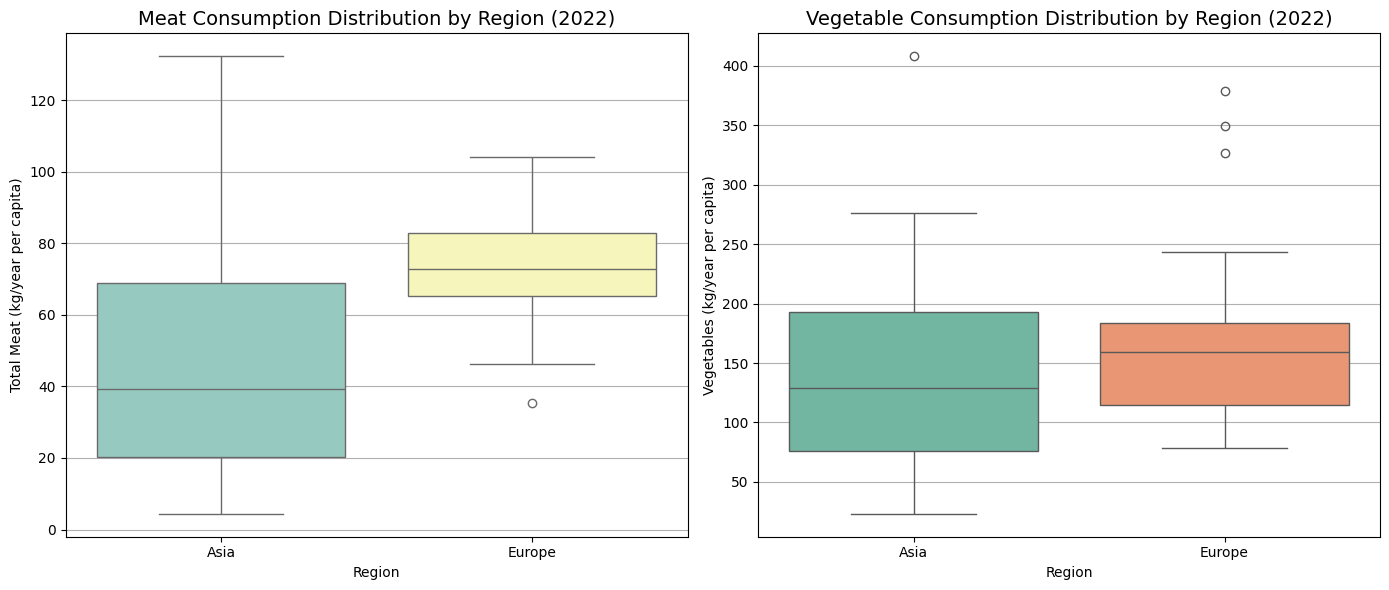

In [6]:
# Load dataset
merged_df = pd.read_csv("datasets/merged_meat_fruit_veg.csv")

# Set figure size for two plots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Box plot for Meat consumption
sns.boxplot(
    data=merged_2022,
    x='region',
    y='Total_Meat_kg_per_capita',
    palette='Set3',
    ax=axs[0]
)
axs[0].set_title('Meat Consumption Distribution by Region (2022)', fontsize=14)
axs[0].set_xlabel('Region')
axs[0].set_ylabel('Total Meat (kg/year per capita)')
axs[0].grid(True, axis='y')

# Box plot for Vegetable consumption
sns.boxplot(
    data=merged_2022,
    x='region',
    y='Vegetables_kg_per_capita',
    palette='Set2',
    ax=axs[1]
)
axs[1].set_title('Vegetable Consumption Distribution by Region (2022)', fontsize=14)
axs[1].set_xlabel('Region')
axs[1].set_ylabel('Vegetables (kg/year per capita)')
axs[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

# Hypothesis Testing through Permutation - Meat Consumption
---
From the EDA, we can see that Europeans seem to eat more meat than Asians, at least on average. Let us test if that is true. We will take the null hypothesis as "Europeans and Asians' meat consumptions per capita are distributed the same", with the alternative hypothesis being that they are not distributed the same.

Mean meat consumption per capita in Europe is : 73.8 kg/capita/year
Mean meat consumption per capita in Asia is : 47.52 kg/capita/year
Difference of mean meat consumption between EU and Asia is : 26.28
95% of differences of means sampled lie between -12.82 and 12.09
One-sided p-value (EU > Asia): 0.0000
Two-sided p-value:             0.0000


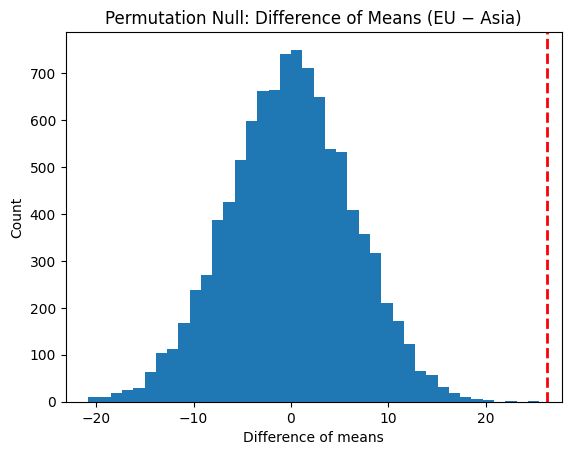

In [7]:
# Let's do hypothesis testing to see if European countries really do eat more meat!
# The way this will work is that for each country there is a meat consumed per capita value.

# Function to find diff of means as this will be important
def diff_of_means(data1, data2) :
    return np.mean(data1) - np.mean(data2)

eu_meat = europe_data['Total_Meat_kg_per_capita']
ap_meat = asia_data['Total_Meat_kg_per_capita']

# We first find the mean meat consumption for the EU and AP.
# Then, we find the observed difference in means.
eu_mean_meat = np.mean(eu_meat)
ap_mean_meat = np.mean(ap_meat)
print(f"Mean meat consumption per capita in Europe is : {np.round(eu_mean_meat, 2)} kg/capita/year")
print(f"Mean meat consumption per capita in Asia is : {np.round(ap_mean_meat, 2)} kg/capita/year")
obsvd_diff_of_means = diff_of_means(eu_meat, ap_meat)
print(f"Difference of mean meat consumption between EU and Asia is : {abs(np.round(obsvd_diff_of_means, 2))}")

# Now, let's do some bootstrap resampling.
# Concatenate the two arrays of EU meat consumption and AP meat consumption.
# Initialise an array to store the differences in means
concat_meat = np.concatenate((eu_meat, ap_meat))
meandiffs = []
samples = 10000

# Repeat the following 10k times:
# Shuffle the new array, then label the first X as "EU" and the rest as "AP"
# Find means for each, and find the difference.
# Append the difference to the diff of means array
for i in range(samples) :
    np.random.shuffle(concat_meat)
    shuffle_EU = concat_meat[:len(eu_meat)]
    shuffle_AP = concat_meat[len(eu_meat):]
    
    shuffle_diff_of_means = diff_of_means(shuffle_EU, shuffle_AP)
    meandiffs.append(shuffle_diff_of_means)

# Now, we should have 10k diff's of means
# Find 95% CI for the diff of means
conf_int_means = np.percentile(meandiffs, (2.5, 97.5))
print(f"95% of differences of means sampled lie between {conf_int_means[0]:.2f} and {conf_int_means[1]:.2f}")
# Draw histogram of diff of means, and show the observed as a vertical line

# p-values
# One-sided (EU > Asia): proportion of null diffs >= observed
p_val_one_sided = np.mean(meandiffs >= obsvd_diff_of_means)
# Two-sided: extremeness by absolute value
p_val_two_sided = np.mean(np.abs(meandiffs) >= abs(obsvd_diff_of_means))

print(f"One-sided p-value (EU > Asia): {p_val_one_sided:.4f}")
print(f"Two-sided p-value:             {p_val_two_sided:.4f}")

# Plot null distribution with observed diff
plt.figure()
plt.hist(meandiffs, bins=40)
plt.axvline(obsvd_diff_of_means, linestyle='--', linewidth=2, color='red')
plt.title("Permutation Null: Difference of Means (EU − Asia)")
plt.xlabel("Difference of means")
plt.ylabel("Count")
plt.show()


## Analysis
---
As can be seen, the observed difference in means between the mean meat consumption and Europe and that of Asia is far outside of the 95% confidence interval, with a p-value of 0.0001 or less. This shows that there is a definite difference between the distribution of meat consumption per capita in Europe and Asia, and that this is not a product of random chance. 

# Bootstrap Resampling and Hypothesis Testing 2
---
We can also see from the EDA that Europeans have slightly more vegetable consumption than Asians as well. This could be a sign that they also eat more vegetables, but could also be a product of random chance. We will first use bootstrap replicates to see the distribution of mean vegetable consumption for both regions.

In [8]:
# Helper function to generate a bootstrap sample
# This should take an array-like data and take a bootstrap sample,
# then take some sort of statistical measurment from it

def bootstrap_replicate_1d(data, func) :
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

# ------------------------------------- x ------------------------------------ #

# Helper function to draw samples amount of bootstrap mean replicates from the data
# Should take the data and the number of samples to take
# Function is mentioned here as the mean

def draw_bootstrap_means(data, samples = 1) :
    means = np.zeros(samples)
    
    for i in range(samples) :
        means[i] = bootstrap_replicate_1d(data, np.mean)
        
    return means

95% of mean European vegetable consumptions per capita sampled lie between 145.75 and 187.49 kg/capita/year
95% of mean Asian vegetable consumptions per capita sampled lie between 115.17 and 162.61 kg/capita/year


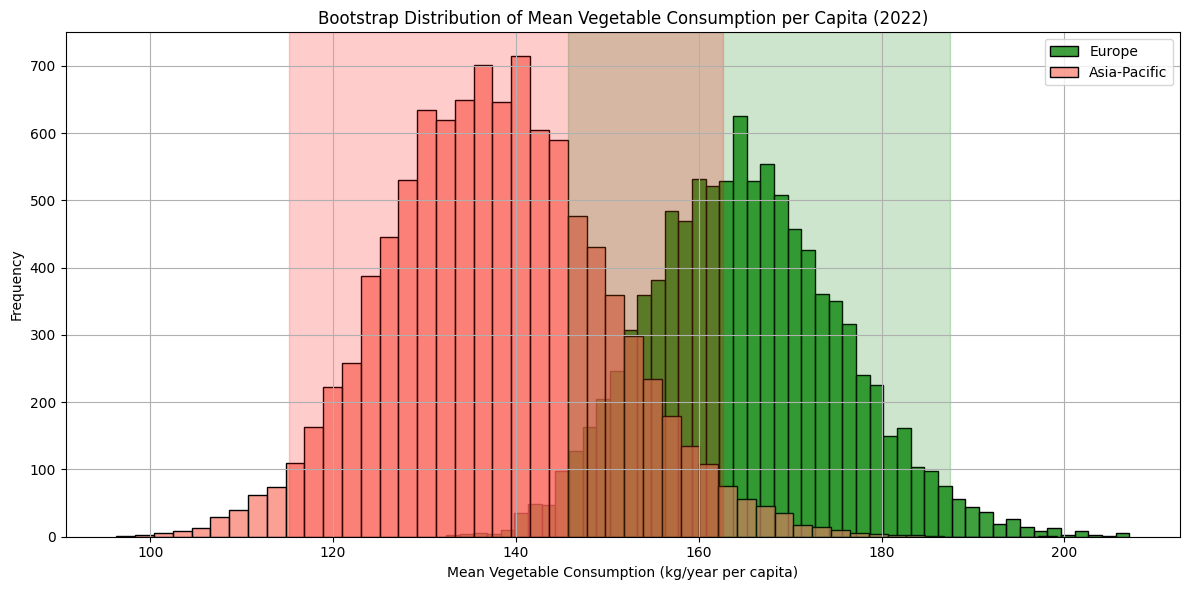

In [9]:
# -------- Bootstrap Replicate Analysis of mean vegetable consumption -------- #

# This code should generate a list of 10k bootstrap replicate means for eu_veg and ap_veg
# Then, generate a 95% confint for each
# Followed by a nice histogram that shows the two means in the same plot along with darker highlighting for the 95%'s

eu_veg = europe_data['Vegetables_kg_per_capita']
ap_veg = asia_data['Vegetables_kg_per_capita']

# Generate BS means
eu_bs_means = draw_bootstrap_means(eu_veg, 10000)
ap_bs_means = draw_bootstrap_means(ap_veg, 10000)

# Calculate confidence intervals
conf_int_means_eu = np.percentile(eu_bs_means, (2.5, 97.5))
conf_int_means_ap = np.percentile(ap_bs_means, (2.5, 97.5))
print(f"95% of mean European vegetable consumptions per capita sampled lie between {conf_int_means_eu[0]:.2f} and {conf_int_means_eu[1]:.2f} kg/capita/year")
print(f"95% of mean Asian vegetable consumptions per capita sampled lie between {conf_int_means_ap[0]:.2f} and {conf_int_means_ap[1]:.2f} kg/capita/year")

# Draw two histograms of the means
# Europe as blue, Asia as salmon
# On the same set of axes
# 95% conf innt should be highlighted somehow

# Plot histograms
plt.figure(figsize=(12, 6))

sns.histplot(eu_bs_means, bins=50, color='green', label='Europe')
sns.histplot(ap_bs_means, bins=50, color='salmon', label='Asia-Pacific')

# Shade confidence intervals
plt.axvspan(conf_int_means_eu[0], conf_int_means_eu[1], color='green', alpha=0.2)
plt.axvspan(conf_int_means_ap[0], conf_int_means_ap[1], color='red', alpha=0.2)

# Labels and legend
plt.title('Bootstrap Distribution of Mean Vegetable Consumption per Capita (2022)')
plt.xlabel('Mean Vegetable Consumption (kg/year per capita)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Analysis
---
As we can see, the distributions of mean vegetable consumption in Europe and Asia are somewhat close together - though there is a favoring towards Europe - so further testing will be required to discern if the difference is statsitcally significant.

Mean vegetable consumption per capita in Europe is : 165.39 kg/capita/year
Mean vegetable consumption per capita in Asia is : 138.17 kg/capita/year
Difference of mean vegetable consumption between EU and Asia is : 27.21
95% of differences of means sampled lie between -33.34 and 32.15
One-sided p-value (EU > Asia): 0.0515
Two-sided p-value:             0.1065


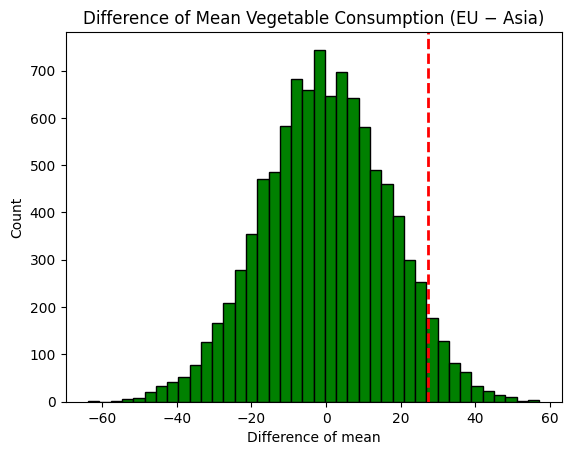

In [10]:
# --------- Hypothesis testing on Europe v Asia Vegetable consumption -------- #

# Null hypo: Europe and Asia's vegetable consumptions are distributed the same
# Alt hypo: They aren't

# We first find the mean vegetable consumption for the EU and AP.
# Then, we find the observed difference in means.
eu_mean_veg = np.mean(eu_veg)
ap_mean_veg = np.mean(ap_veg)
print(f"Mean vegetable consumption per capita in Europe is : {eu_mean_veg:.2f} kg/capita/year")
print(f"Mean vegetable consumption per capita in Asia is : {ap_mean_veg:.2f} kg/capita/year")
obsvd_diff_of_means = diff_of_means(eu_veg, ap_veg)
print(f"Difference of mean vegetable consumption between EU and Asia is : {abs(obsvd_diff_of_means):.2f}")

# ------------------------------------- x ------------------------------------ #

# Now, let's do some bootstrap resampling.
# Concatenate the two arrays of EU vegetable consumption and AP vegetable consumption.
# Initialise an array to store the differences in means
concat_veg = np.concatenate((eu_veg, ap_veg))
meandiffs = []
samples = 10000

# Repeat the following 10k times:
# Shuffle the new array, then label the first X as "EU" and the rest as "AP"
# Find means for each, and find the difference.
# Append the difference to the diff of means array
for i in range(samples) :
    np.random.shuffle(concat_veg)
    shuffle_EU = concat_veg[:len(eu_veg)]
    shuffle_AP = concat_veg[len(eu_veg):]
    
    shuffle_diff_of_means = diff_of_means(shuffle_EU, shuffle_AP)
    meandiffs.append(shuffle_diff_of_means)

# Now, we should have 10k diff's of means
# Find 95% CI for the diff of means
conf_int_means = np.percentile(meandiffs, (2.5, 97.5))
print(f"95% of differences of means sampled lie between {conf_int_means[0]:.2f} and {conf_int_means[1]:.2f}")
# Draw histogram of diff of means, and show the observed as a vertical line

# ------------------------------------- x ------------------------------------ #

# p-values
# One-sided (EU > Asia): proportion of null diffs >= observed
p_val_one_sided = np.mean(meandiffs >= obsvd_diff_of_means)
# Two-sided: extremeness by absolute value
p_val_two_sided = np.mean(np.abs(meandiffs) >= abs(obsvd_diff_of_means))

print(f"One-sided p-value (EU > Asia): {p_val_one_sided:.4f}")
print(f"Two-sided p-value:             {p_val_two_sided:.4f}")

# ------------------------------------- x ------------------------------------ #

# Plot null distribution with observed diff
plt.figure()
plt.hist(meandiffs, bins=40, color='green', edgecolor='black')
plt.axvline(obsvd_diff_of_means, linestyle='--', linewidth=2, color='red')
plt.title("Difference of Mean Vegetable Consumption (EU − Asia)")
plt.xlabel("Difference of mean")
plt.ylabel("Count")
plt.show()


## Analysis
---
With an observed difference in means of 27.21, we can see that the difference lies just within the 95% confidence interval of diffrence of means obtained through permutation sampling. The hypothesis test also reveals a one-tailed p-value of 0.0556 - 5.56%. While this is a rather small value, it is not as statistically significant as the advantage Europe has over Asia in per-capita meat consumption. However, we can conclude that Europe eats more meat than Asia on average, and somewhat more vegetables. The next step would be to discern the reasons behind this difference. What factors affect meat and vegetable consumption in these two regions?

# Linear Regression
---
In this section, we will attempt to discern the relationship between meat/vegetable consumption in Europe and Asia versus various factors such as temperature, urbanisation and GDP per capita. Through this, we may shed light on what factors drive diet and consumption habits, and derive possible recommendations for a more balanced consumption.


=== Meat vs Fruit Consumption (2022) ===
Asia: slope=0.349, intercept=61.450, R²=0.083, p(reg)=0.0520, Pearson r=0.288, p(corr)=0.0520
Europe: slope=-0.294, intercept=135.817, R²=0.016, p(reg)=0.4466, Pearson r=-0.125, p(corr)=0.4466

=== Meat vs Vegetable Consumption (2022) ===
Asia: slope=1.009, intercept=90.225, R²=0.155, p(reg)=0.0068, Pearson r=0.394, p(corr)=0.0068
Europe: slope=-0.722, intercept=218.668, R²=0.027, p(reg)=0.3206, Pearson r=-0.163, p(corr)=0.3206


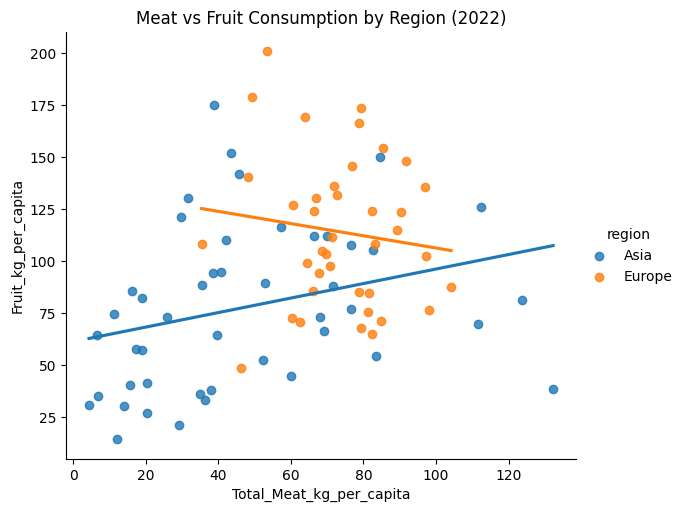

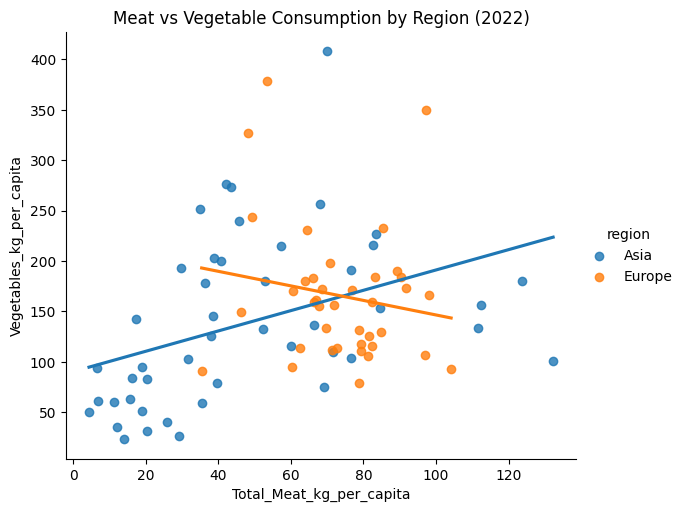

In [11]:
# ----- load data  -----
df = merged_2022.copy()

# Ensure only Asia & Europe remain (optional safeguard)
df = df[df['region'].isin(['Asia', 'Europe'])]

# ----- FUNCTION: Regression + Correlation -----
def regression_and_correlation_by_region(df, y_var):
    results = {}
    for region in ['Asia', 'Europe']:
        subset = df[df['region'] == region]
        
        # Pearson correlation
        pearson_r, pearson_p = stats.pearsonr(
            subset['Total_Meat_kg_per_capita'], subset[y_var]
        )
        
        # Linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(
            subset['Total_Meat_kg_per_capita'], subset[y_var]
        )
        
        results[region] = {
            'slope': slope,
            'intercept': intercept,
            'R² (regression)': r_value**2,
            'p-value (regression)': p_value,
            'Pearson r': pearson_r,
            'p-value (correlation)': pearson_p
        }
    return results

# ----- FRUIT -----
fruit_results = regression_and_correlation_by_region(df, 'Fruit_kg_per_capita')
print("\n=== Meat vs Fruit Consumption (2022) ===")
for region, res in fruit_results.items():
    print(f"{region}: slope={res['slope']:.3f}, intercept={res['intercept']:.3f}, "
          f"R²={res['R² (regression)']:.3f}, p(reg)={res['p-value (regression)']:.4f}, "
          f"Pearson r={res['Pearson r']:.3f}, p(corr)={res['p-value (correlation)']:.4f}")

# ----- VEGETABLES -----
veg_results = regression_and_correlation_by_region(df, 'Vegetables_kg_per_capita')
print("\n=== Meat vs Vegetable Consumption (2022) ===")
for region, res in veg_results.items():
    print(f"{region}: slope={res['slope']:.3f}, intercept={res['intercept']:.3f}, "
          f"R²={res['R² (regression)']:.3f}, p(reg)={res['p-value (regression)']:.4f}, "
          f"Pearson r={res['Pearson r']:.3f}, p(corr)={res['p-value (correlation)']:.4f}")

# ----- VISUALISATIONS -----
# Fruit plot
sns.lmplot(
    x='Total_Meat_kg_per_capita', y='Fruit_kg_per_capita',
    hue='region', data=df, height=5, aspect=1.2, ci=None
)
plt.title('Meat vs Fruit Consumption by Region (2022)')
plt.show()

# Vegetable plot
sns.lmplot(
    x='Total_Meat_kg_per_capita', y='Vegetables_kg_per_capita',
    hue='region', data=df, height=5, aspect=1.2, ci=None
)
plt.title('Meat vs Vegetable Consumption by Region (2022)')
plt.show()



=== Multiple Regression: Fruit Consumption (2022) ===

Asia: R²=0.151
  Intercept            coef=    63.606, p=0.0009
  Total_Meat_kg_per_capita coef=     0.014, p=0.9600
  GDP_per_capita       coef=     0.001, p=0.0950
  Annual_avg_temp      coef=    -0.113, p=0.8752

Europe: R²=0.159
  Intercept            coef=   104.702, p=0.0015
  Total_Meat_kg_per_capita coef=    -0.501, p=0.1959
  GDP_per_capita       coef=     0.000, p=0.0996
  Annual_avg_temp      coef=     2.817, p=0.0428

=== Multiple Regression: Vegetable Consumption (2022) ===

Asia: R²=0.291
  Intercept            coef=   171.390, p=0.0000
  Total_Meat_kg_per_capita coef=     0.261, p=0.6248
  GDP_per_capita       coef=     0.001, p=0.1616
  Annual_avg_temp      coef=    -3.922, p=0.0072

Europe: R²=0.049
  Intercept            coef=   196.226, p=0.0028
  Total_Meat_kg_per_capita coef=    -0.885, p=0.2543
  GDP_per_capita       coef=     0.000, p=0.5078
  Annual_avg_temp      coef=     1.988, p=0.4654


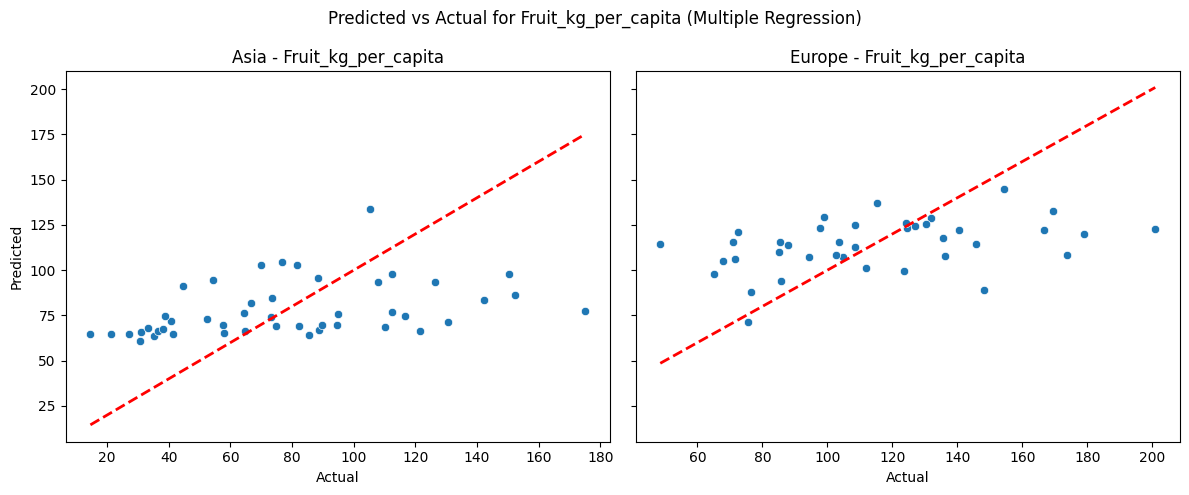

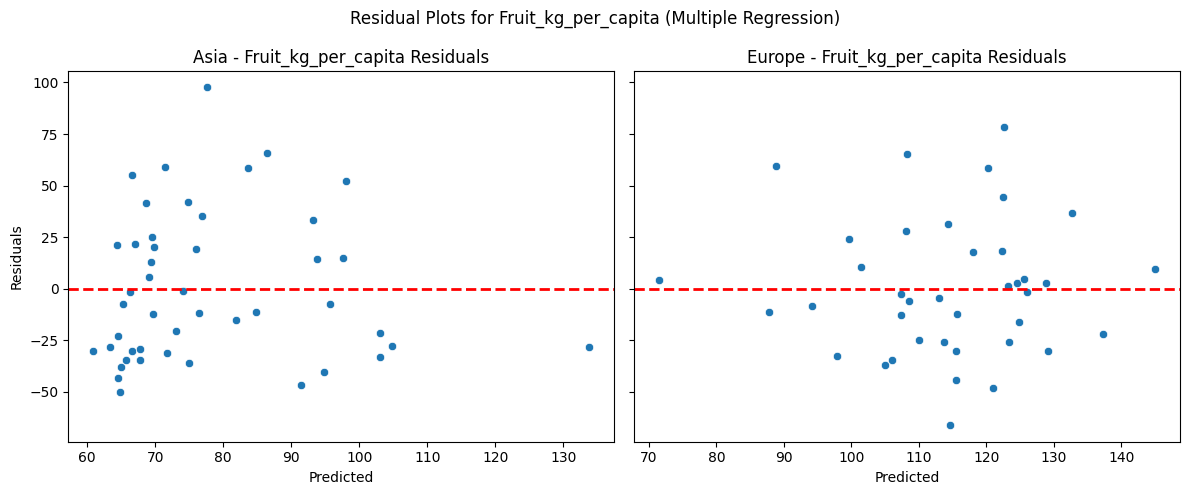

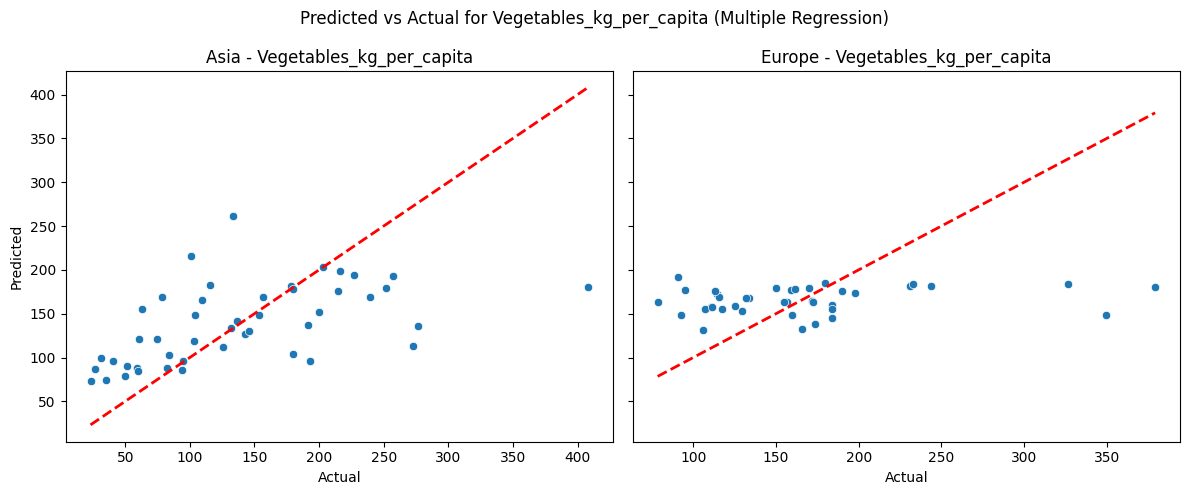

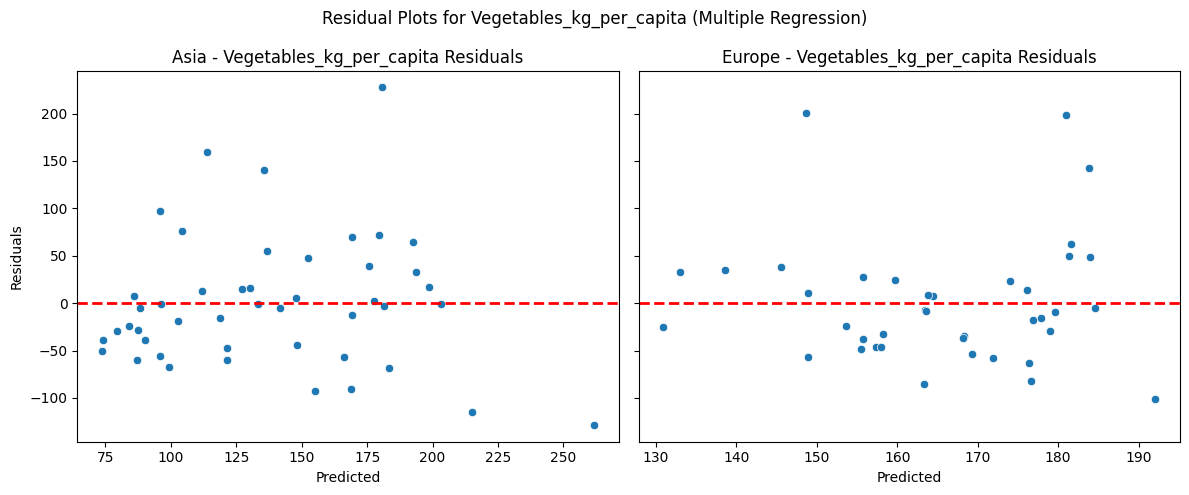

In [12]:

# ----- LOAAAAAAAAAAAADDDDDDDDDDDDDDDDDDDDDDDDDDDD :(  -----
df = merged_2022.copy()
df = df[df['region'].isin(['Asia', 'Europe'])]

def multiple_regression_by_region(df, y_var, predictors):
    results = {}
    for region in ['Asia', 'Europe']:
        subset = df[df['region'] == region]
        
        # add constant column for intercept
        X = subset[predictors].values
        X = np.column_stack([np.ones(X.shape[0]), X])  
        y = subset[y_var].values
        
        # coef: (X^T X)^(-1) X^T y
        beta, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)
        
        # predictions and r^2
        y_pred = X @ beta
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2 = 1 - ss_res/ss_tot
        
        # errors and t-stats
        n, k = X.shape
        sigma2 = ss_res / (n - k)
        cov_beta = sigma2 * np.linalg.inv(X.T @ X)
        se_beta = np.sqrt(np.diag(cov_beta))
        t_stats = beta / se_beta
        p_values = [2 * (1 - stats.t.cdf(abs(t), df=n-k)) for t in t_stats]
        
        results[region] = {
            'coefficients': dict(zip(['Intercept'] + predictors, beta)),
            'R²': r2,
            'p-values': dict(zip(['Intercept'] + predictors, p_values)),
            'predictions': y_pred,
            'actuals': y
        }
    return results


#  run that function: meat + gdp + temp to predict fruit 
fruit_multi = multiple_regression_by_region(
    df,
    y_var='Fruit_kg_per_capita',
    predictors=['Total_Meat_kg_per_capita', 'GDP_per_capita', 'Annual_avg_temp']
)

print("\n=== Multiple Regression: Fruit Consumption (2022) ===")
for region, res in fruit_multi.items():
    print(f"\n{region}: R²={res['R²']:.3f}")
    for var, coef in res['coefficients'].items():
        pval = res['p-values'][var]
        print(f"  {var:20s} coef={coef:10.3f}, p={pval:.4f}")


# run that function: meat + gdp + temp to predict veggies 
veg_multi = multiple_regression_by_region(
    df,
    y_var='Vegetables_kg_per_capita',
    predictors=['Total_Meat_kg_per_capita', 'GDP_per_capita', 'Annual_avg_temp']
)

print("\n=== Multiple Regression: Vegetable Consumption (2022) ===")
for region, res in veg_multi.items():
    print(f"\n{region}: R²={res['R²']:.3f}")
    for var, coef in res['coefficients'].items():
        pval = res['p-values'][var]
        print(f"  {var:20s} coef={coef:10.3f}, p={pval:.4f}")


#  plot 
def plot_predicted_vs_actual(df, y_var, predictors, results):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    
    for ax, region in zip(axes, ['Asia', 'Europe']):
        subset = df[df['region'] == region]
    
        y = results[region]['actuals']
        y_pred = results[region]['predictions']
        
        # Scatter
        sns.scatterplot(x=y, y=y_pred, ax=ax)
        ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # diagonal line
        ax.set_title(f"{region} - {y_var}")
        ax.set_xlabel("Actual")
        ax.set_ylabel("Predicted")
    
    plt.suptitle(f"Predicted vs Actual for {y_var} (Multiple Regression)")
    plt.tight_layout()
    plt.show()


def plot_residuals(df, y_var, predictors, results):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    
    for ax, region in zip(axes, ['Asia', 'Europe']):
        y = results[region]['actuals']
        y_pred = results[region]['predictions']
        residuals = y - y_pred
        
        sns.scatterplot(x=y_pred, y=residuals, ax=ax)
        ax.axhline(0, color='red', linestyle='--', lw=2)
        ax.set_title(f"{region} - {y_var} Residuals")
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Residuals")
    
    plt.suptitle(f"Residual Plots for {y_var} (Multiple Regression)")
    plt.tight_layout()
    plt.show()


# plot and run fruit
plot_predicted_vs_actual(df,
                         y_var='Fruit_kg_per_capita',
                         predictors=['Total_Meat_kg_per_capita','GDP_per_capita','Annual_avg_temp'],
                         results=fruit_multi)

plot_residuals(df,
               y_var='Fruit_kg_per_capita',
               predictors=['Total_Meat_kg_per_capita','GDP_per_capita','Annual_avg_temp'],
               results=fruit_multi)

# plot and run veggies
plot_predicted_vs_actual(df,
                         y_var='Vegetables_kg_per_capita',
                         predictors=['Total_Meat_kg_per_capita','GDP_per_capita','Annual_avg_temp'],
                         results=veg_multi)

plot_residuals(df,
               y_var='Vegetables_kg_per_capita',
               predictors=['Total_Meat_kg_per_capita','GDP_per_capita','Annual_avg_temp'],
               results=veg_multi)


## Linear regression conclusions:
Simple regression (meats vs fruits and veg):

- In Asia, meat consumption shows a weak positive link with fruit (R^2 ≈ 0.08, p ≈ 0.05) and a stronger, significant link with vegetables (R^2 ≈ 0.16, p < 0.01).

- In Europe, both fruit and vegetables show weak negative, non-significant trends with meat (R^2 < 0.03).

Multiple regression with GDP and temp

- Asia:

    - Fruit: GDP per capita is a weak positive predictor (p ≈ 0.095), meat and temperature not significant.

    - Vegetables: Cooler climates predict higher consumption (p ≈ 0.007), GDP and meat not significant.

- Europe:

    - Fruit: Warmer climates predict higher fruit intake (p ≈ 0.043); GDP marginal, meat not significant.

    - Vegetables: No predictors significant (R^2 ≈ 0.05).

To conclude:
Meat consumption alone does not explain fruit/veg intake. In Asia, diets are more influenced by GDP (fruit) and climate (vegetables). In Europe, neither meat nor GDP explains much—fruit shows some climate effects, but vegetables are driven by other cultural or policy factors.

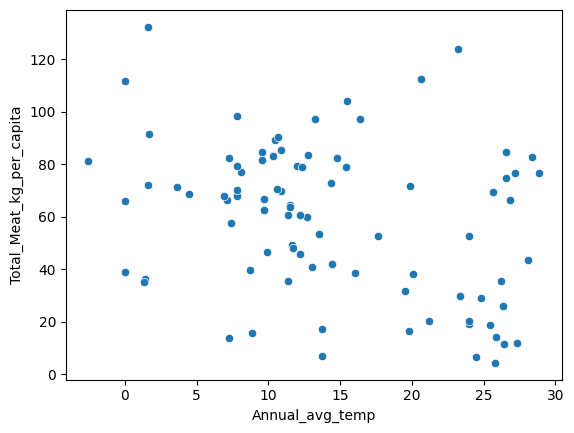

In [13]:
# import the dataframe fruit meat veg
# Plot scatterplot of meat and avg temp
# Plot scatterplot of veg and avg temp

df = pd.read_csv('datasets/merged_meat_fruit_veg.csv')

# ------------------ Scatterplot of temp vs meat consumption ----------------- #
sns.scatterplot(data = df, x = 'Annual_avg_temp', y = 'Total_Meat_kg_per_capita')
plt.show()

61       2273.8962
247      3408.1760
592      3162.6755
844      3759.6050
875      3347.8323
           ...    
12097    3061.7020
12177    3322.3113
12459    3242.6523
12645    3026.1520
12955    1836.5494
Name: Daily calorie supply per person, Length: 85, dtype: float64
0     2273.8962
1     3408.1760
2     3162.6755
3     3759.6050
4     3347.8323
        ...    
80    3061.7020
81    3322.3113
82    3242.6523
83    3026.1520
84    1836.5494
Name: caloric, Length: 85, dtype: float64


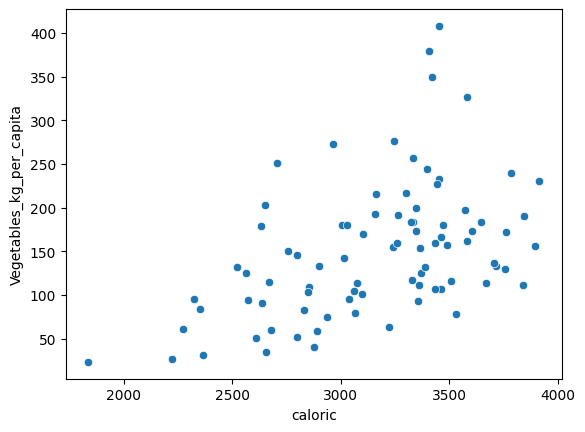

In [14]:
# Time for some memes
# There is another dataset, caloric supply. Make it only have the countries inside merged
# Then, make it only have year 2022
# Then, take the caloric supply and map it into the main dataset
# Do scatterplot of consumption vs caloric supply

df_caloric = pd.read_csv('datasets/daily-per-capita-caloric-supply.csv')
df_caloric = df_caloric[df_caloric['Entity'].isin(df['Entity'])]
df_caloric = df_caloric[df_caloric['Year'] == 2022]

df = df[df['Year'] == 2022]
df = df.sort_values(by='Entity').reset_index(drop=True)

print(df_caloric['Daily calorie supply per person'])
df['caloric'] = df_caloric['Daily calorie supply per person'].values
print(df['caloric'])
sns.scatterplot(data = df, x = 'caloric', y = 'Vegetables_kg_per_capita')
plt.show()

62       26.616
126      63.799
574      63.573
766      59.256
830      57.170
          ...  
13822    87.543
13886    84.398
14206    50.466
14398    38.766
14526    39.188
Name: Urban population (% of total population), Length: 85, dtype: float64
0     26.616
1     63.799
2     63.573
3     59.256
4     57.170
       ...  
80    87.543
81    84.398
82    50.466
83    38.766
84    39.188
Name: urban, Length: 85, dtype: float64


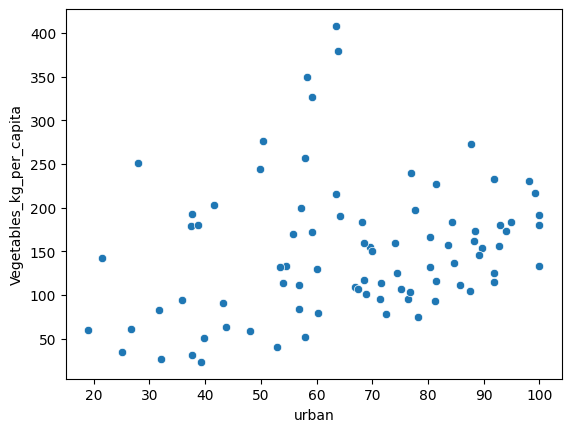

In [15]:
# Same shit with share of urban

df_urban = pd.read_csv('datasets/share-of-population-urban.csv')
df_urban = df_urban[df_urban['Entity'].isin(df['Entity'])]
df_urban = df_urban[df_urban['Year'] == 2022]

print(df_urban['Urban population (% of total population)'])
df['urban'] = df_urban['Urban population (% of total population)'].values
print(df['urban'])
sns.scatterplot(data = df, x = 'urban', y = 'Vegetables_kg_per_capita')
plt.show()

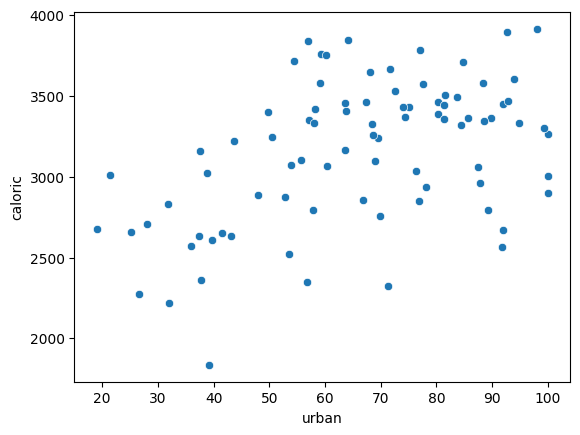

In [16]:
sns.scatterplot(data = df, x = 'urban', y = 'caloric')
plt.show()

# Linear Regression Attempt 2
---
In this section, we will attempt to discern the relationship between meat/vegetable consumption in Europe and Asia versus various factors such as temperature, urbanisation and GDP per capita. Through this, we may shed light on what factors drive diet and consumption habits, and derive possible recommendations for a more balanced consumption.

In [35]:
# Import necessary libraries
import pandas as pd
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

## Meat Consumption and GDP Per Capita
---
Richer countries tend to be able to afford more meat to eat, so there should be a positive correlation between meat consumption per capita and GDP per capita. For Europe and Asia, let's build a model of GDP per capita on the Y axis and Meat consumption per capita on the Y axis.

- We will start by drawing a scatter plot of Meat consumption against GDP
- We will then create a model based on training data
- We will then test the model on the rest of the data, which will be the test data.
- Error values will be analysed and the goodness of fit will be determined through bootstrap resampling and permutation hypothesis testing

### Making the Scatter Plot

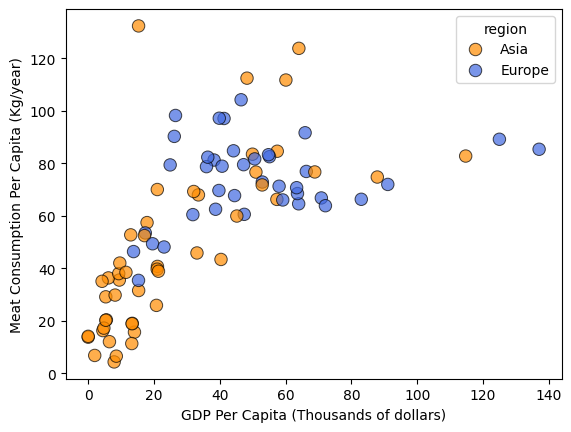

In [ ]:
# Make scatter plot

# Take Europe and Asia Dataset
merged_df = pd.read_csv("datasets/merged_meat_fruit_veg.csv")

# Make GDP in thousands of dollars to avoid insane model params later on
merged_df['GDP_per_capita'] /= 1000

# Create scatterplot of GDP to meat consumption
_ = sns.scatterplot(
    data=merged_df,
    x='GDP_per_capita',
    y='Total_Meat_kg_per_capita',
    hue='region',
    palette={'Europe': 'royalblue', 'Asia': 'darkorange'},
    s=80, alpha=0.7, edgecolor='k'
)
_ = plt.xlabel('GDP Per Capita (Thousands of dollars)')
_ = plt.ylabel('Meat Consumption Per Capita (Kg/year)')
plt.show()
# Color EU and AP for comparison only

### Scatterplot Analysis
---
We can see from the scatter plot that there is some positive correlation between GDP per capita and Meat Consumpption per capita, barring a few outliers of extremely wealthy European and Asian countries. We can quantify this relationship through a linear model, which we wil now make.

### Creating training data and making model

In [51]:
# Create model based on training data

# 30% of data used to fit model
# Random state for reproducibility
df_train, df_test = train_test_split(merged_df, test_size=0.4, random_state=111)

print(df_train.head())
print()
meat_model = ols(formula="Total_Meat_kg_per_capita ~ GDP_per_capita", data=df_train).fit()
print(meat_model.params)

                    Entity Code  Year  region  Total_Meat_kg_per_capita  \
30                Portugal  PRT  2022  Europe                 97.038993   
62  Bosnia and Herzegovina  BIH  2022  Europe                 49.359015   
73                   China  CHN  2022    Asia                 70.004751   
72                 Moldova  MDA  2022  Europe                 35.429355   
82                 Czechia  CZE  2022  Europe                 81.655772   

      Poultry  BeefBuffalo  SheepGoat        Pig  OtherMeat  \
30  32.359478    22.125128   2.257867  39.675360   0.621160   
62  22.015816    13.389087   0.373320  13.177202   0.403590   
73  17.148512     8.043993   3.861917  40.179947   0.770382   
72  22.740830     1.021650   0.009122  11.402341   0.255412   
82  23.469276    10.599028   0.285132  46.486270   0.816066   

    Fruit_kg_per_capita  Vegetables_kg_per_capita  Annual_avg_temp  \
30           135.748100                106.908530        16.392926   
62           178.860860       

### Model Analysis
---

In [52]:
# Test model on rest of the data
y_pred = meat_model.predict(df_test)

residuals = df_test['Total_Meat_kg_per_capita'] - y_pred

RSS = np.sum(np.square(residuals))
TSS = np.sum(np.square(df_test['Total_Meat_kg_per_capita']-np.mean(df_test['Total_Meat_kg_per_capita'])))

rsquare = 1 - RSS/TSS
print(f"R^2 = {rsquare:.4f}")

rmse = np.sqrt(RSS/len(df_test))
print(f"RMSE = {rmse:.4f}")

R^2 = 0.2563
RMSE = 23.2386


### Test Results Breakdown
---

In [53]:
# Goodness of fit

# For this, let's figure out 

### Final Thoughts on Model
---